 PART 1: Data Import and Exploration 
 
 

Summarize initial observations and findings from the dataset.


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score
import time # to measure how long the models take
from sklearn import datasets
import seaborn as sns
from scipy.stats import mode

Loaded the dataset using pd.read_csv()

In [9]:
# load train dataset
train_data = pd.read_csv("https://raw.githubusercontent.com/TaunyaT/schulich_data_science/refs/heads/main/train.csv?token=GHSAT0AAAAAACXY7WSE2KY4ORMVWIIOH6L2ZXQTT5Q", delimiter=';')

In [10]:
# Explore data
train_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Preprocessing Pipeline:

Performed One Hot Encoding on categorical columns: job, marital, education, housing, campaign. One Hot Encoding was necessary for categorical columns to allow models to interpret the features. Scaling helps improve convergence for certain models like k-NN.


In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# The dataset contains 45,211 entries and 17 columns, with a mix of categorical and numerical data.

In [12]:
# no empty values
# convert to numerical (0,1) -- default, housing, loan, y

In [13]:
train_data.isnull()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45207,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45208,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
45209,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
train_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [15]:
# scale - age, balance, duration, pdays
# check for outliers - campaign, pdays, previous

In [16]:
# Check each column to see if it contains the value 'unknown'
columns_with_unknown = train_data.columns[train_data.isin(['unknown']).any()].tolist()

# Display the columns that contain 'unknown'
print("Columns containing 'unknown' values:", columns_with_unknown)

Columns containing 'unknown' values: ['job', 'education', 'contact', 'poutcome']


In [17]:
# Determine how many rows and coluns there are.
train_data.shape  

(45211, 17)

In [18]:
# convert to numberical 0-1;2 categories
train_data['default'] = train_data['default'].map({'yes': 1, 'no': 0})
train_data['housing'] = train_data['housing'].map({'yes': 1, 'no': 0})
train_data['loan'] = train_data['loan'].map({'yes': 1, 'no': 0})
train_data['y'] = train_data['y'].map({'yes': 1, 'no': 0})

In [19]:
# Total of each option in job
train_data['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [20]:
# Handle unknowns - blue colar has large portion and is generally common
# There are too many unkowns to drop the rows, but dropping the column would be suitable
# Replace unknowns with blue-collar - small amount of unknowns so minor impact -- change to blue-collar

In [21]:
# Replace 'unknown' with the most common value (mode)
most_common_job = train_data['job'].mode()[0]
train_data['job'] = train_data['job'].replace('unknown', most_common_job)

In [22]:
# Total of each option in job after unknown replacement
train_data['job'].value_counts()

job
blue-collar      10020
management        9458
technician        7597
admin.            5171
services          4154
retired           2264
self-employed     1579
entrepreneur      1487
unemployed        1303
housemaid         1240
student            938
Name: count, dtype: int64

In [23]:
# Total of each option in education
train_data['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

In [24]:
# How to treat education unknowns
# Impute unknown values based on patterns in job column
train_data.loc[(train_data['education'] == 'unknown') & (train_data['job'] == 'blue-collar'), 'education'] = 'secondary'
train_data.loc[(train_data['education'] == 'unknown') & (train_data['job'] == 'management'), 'education'] = 'tertiary'

In [25]:
train_data['education'].value_counts()

education
secondary    23783
tertiary     13543
primary       6851
unknown       1034
Name: count, dtype: int64

In [26]:
# Replace 'unknown' with the most common value (mode)
most_common_education = train_data['education'].mode()[0]
train_data['education'] = train_data['education'].replace('unknown', most_common_education)

In [27]:
train_data['education'].value_counts()

education
secondary    24817
tertiary     13543
primary       6851
Name: count, dtype: int64

In [28]:
# Total of each option in contact
train_data['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

In [29]:
# There is not a comparable count for telephone, as well there is a significant representation of unknowns. If we replace unknow with cellular, will greatly outweigh telephone, adding no real value to the analysis as it will generally have the same outcome for each sample (offering no significant predictive value)

In [30]:
# Crosstab to see how 'contact' relates to the target 'y'
pd.crosstab(train_data['contact'], train_data['y'], normalize='index')

y,0,1
contact,,
cellular,0.850811,0.149189
telephone,0.865795,0.134205
unknown,0.959293,0.040707


In [31]:
# Drop contact column
train_data = train_data.drop('contact', axis=1)

In [32]:
train_data.shape  

(45211, 16)

Only 16 columns - contact has been dropped

In [33]:
# Total of each option in poutcome
train_data['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [34]:
# There are not enough known values for failure and success (not sure what other represents) to determine an accurate replacement value

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
# Crosstab to see how 'poutcome' relates to the target variable 'y'
pd.crosstab(train_data['poutcome'], train_data['y'], normalize='index')

y,0,1
poutcome,,
failure,0.873903,0.126097
other,0.833152,0.166848
success,0.352747,0.647253
unknown,0.908385,0.091615


There is a similarity between the percentage/ proportion of no's for unknown and the failure rate's percentage of no's.
Combining these coloumns may make sense.

In [37]:
import matplotlib.pyplot as plt

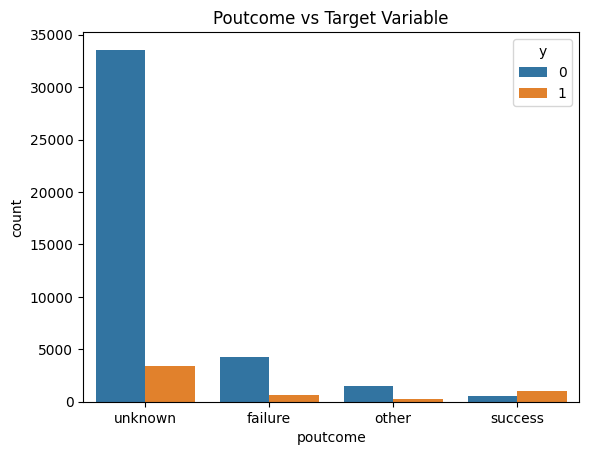

In [38]:
# Plot the relationship between 'poutcome' and 'y'
sns.countplot(x='poutcome', hue='y', data=train_data)
plt.title("Poutcome vs Target Variable")
plt.show()

In [39]:
# Combining unknown and failure
train_data['poutcome'] = train_data['poutcome'].replace('unknown', 'failure')

In [40]:
# Checking after combination
train_data['poutcome'].value_counts()

poutcome
failure    41860
other       1840
success     1511
Name: count, dtype: int64

In [41]:
# Crosstab to see combined how 'poutcome' values relates to the target variable 'y'
pd.crosstab(train_data['poutcome'], train_data['y'], normalize='index')

y,0,1
poutcome,,
failure,0.904348,0.095652
other,0.833152,0.166848
success,0.352747,0.647253


# Distribution is between no and yes is relatively similar to pre-combination of unknow and failure outcomes

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
# Initialize OneHotEncoder
encoder = OneHotEncoder(dtype=int, handle_unknown='ignore', sparse_output=False)

In [44]:
# Fit and transform the specified columns
encoded_cols = encoder.fit_transform(train_data[['job', 'marital', 'education', 'month', 'poutcome']])
# Create a DataFrame from the encoded columns and ensure index alignment
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'month', 'poutcome']), index=train_data.index)

# Concatenate the encoded DataFrame back to the original train_data
train_data = pd.concat([train_data, encoded_df], axis=1)

# Drop the original columns
train_data = train_data.drop(columns=['job', 'marital', 'education', 'month', 'poutcome'])

In [45]:
train_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,1,0,0,0,1,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,1,0,0,0,1,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,1,0,0,0,1,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,1,0,0,0,1,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,977,3,-1,0,...,0,0,0,0,1,0,0,1,0,0
45207,71,0,1729,0,0,17,456,2,-1,0,...,0,0,0,0,1,0,0,1,0,0
45208,72,0,5715,0,0,17,1127,5,184,3,...,0,0,0,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,508,4,-1,0,...,0,0,0,0,1,0,0,1,0,0


In [46]:
from sklearn.preprocessing import MinMaxScaler

In [47]:
# Scaling numerical columns with MinMaxScaler (between 0 and 1)
scaler = MinMaxScaler()
train_data[['age','balance','duration', 'campaign', 'pdays', 'previous','day']] = scaler.fit_transform(train_data[['age','balance','duration', 'campaign', 'pdays', 'previous', 'day']])

In [48]:
train_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.519481,0,0.092259,1,0,0.133333,0.053070,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
1,0.337662,0,0.073067,1,0,0.133333,0.030704,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
2,0.194805,0,0.072822,1,1,0.133333,0.015453,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
3,0.376623,0,0.086476,1,0,0.133333,0.018707,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
4,0.194805,0,0.072812,0,0,0.133333,0.040260,0.000000,0.000000,0.000000,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.428571,0,0.080293,0,0,0.533333,0.198658,0.032258,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
45207,0.688312,0,0.088501,0,0,0.533333,0.092721,0.016129,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0
45208,0.701299,0,0.124689,0,0,0.533333,0.229158,0.064516,0.212156,0.010909,...,0,0,0,0,1,0,0,0,0,1
45209,0.506494,0,0.078868,0,0,0.533333,0.103294,0.048387,0.000000,0.000000,...,0,0,0,0,1,0,0,1,0,0


# A pipeline was created to process the data, including the following steps:

# One-Hot Encoding. Applied One Hot Encoding for categorical variables like job, education, etc. One Hot Encoding is necessary to convert categorical variables into a format usable by the models.
# Scaling: Scaling ensures features are normalized, especially for models sensitive to feature scaling like k-NN.
# Handling missing values: Missing values were handled, ensuring no data inconsistencies.


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

TEST DATA PREPARATION

In [50]:
test_data = pd.read_csv("https://raw.githubusercontent.com/TaunyaT/schulich_data_science/refs/heads/main/test.csv?token=GHSAT0AAAAAACXY7WSEVZMCZ7ZP4VW3KUMGZXQTUXA", delimiter=';')

For simplicity test data has some aspects transformed before pipeline creation

In [51]:
# convert to numberical 0-1;2 categories
test_data['default'] = test_data['default'].map({'yes': 1, 'no': 0})
test_data['housing'] = test_data['housing'].map({'yes': 1, 'no': 0})
test_data['loan'] = test_data['loan'].map({'yes': 1, 'no': 0})
test_data['y'] = test_data['y'].map({'yes': 1, 'no': 0})

In [52]:
# Replace 'unknown' with the most common value (mode)
most_common_job_test = test_data['job'].mode()[0]
test_data['job'] = test_data['job'].replace('unknown', most_common_job_test)

In [53]:
# Impute unknown values based on patterns in job column
test_data.loc[(test_data['education'] == 'unknown') & (test_data['job'] == 'blue-collar'), 'education'] = 'secondary'
test_data.loc[(test_data['education'] == 'unknown') & (test_data['job'] == 'management'), 'education'] = 'tertiary'

In [54]:
# Impute remaining unknown values with most common value
most_common_education_test = test_data['education'].mode()[0]
test_data['education'] = test_data['education'].replace('unknown', most_common_education_test)


In [55]:
# Combining unknown and failure
test_data['poutcome'] = test_data['poutcome'].replace('unknown', 'failure')

In [56]:
test_data = test_data.drop('contact', axis=1)

In [57]:
# Fit and transform the specified columns
encoded_cols = encoder.fit_transform(test_data[['job', 'marital', 'education', 'month', 'poutcome']])
# Create a DataFrame from the encoded columns and ensure index alignment
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(['job', 'marital', 'education', 'month', 'poutcome']), index=test_data.index)

# Concatenate the encoded DataFrame back to the original train_data
test_data = pd.concat([test_data, encoded_df], axis=1)

# Drop the original columns
test_data = test_data.drop(columns=['job', 'marital', 'education', 'month', 'poutcome'])

In [58]:
# Scaling numerical columns with MinMaxScaler (between 0 and 1)
scaler = MinMaxScaler()
test_data[['age','balance','duration', 'campaign', 'pdays', 'previous','day']] = scaler.fit_transform(test_data[['age','balance','duration', 'campaign', 'pdays', 'previous', 'day']])

In [59]:
# Drop target column from test dataset (X test)
f_test_data = test_data.drop(columns=['y'])

In [60]:
# Only keep the target column from test data set (y test)
t_test_data = test_data['y']

In [61]:
# Drop target column from train dataset (X train)
f_train_data = train_data.drop(columns=['y'])

In [62]:
# Only keep the target column from train data set (y train)
t_train_data = train_data['y']

Begin preprocessing

Test data same number of columns as train data and same number of rows in original test file - confident transformation was successful

# Each transformation was chosen to handle specific data challenges such as categorical variables and scaling for algorithms sensitive to feature magnitude.

*** PART 2 ***

# Part 2: Build Baseline Models
# Logistic Regression:
Built a Logistic Regression model with default parameters. Hyperparameter Tuning was performed using GridSearchCV, optimizing parameters such as C (regularization strength).
# k-Nearest Neighbors (k-NN):
Created a k-NN model with default settings.
Tuned the number of neighbors (k) and other parameters using cross-validation to optimize performance.


In [63]:
from sklearn.linear_model import LogisticRegression 

In [64]:
f_test_data

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success
0,0.161765,0,0.068455,0,0,0.600000,0.024826,0.000000,0.000000,0.00,...,0,0,0,0,0,1,0,1,0,0
1,0.205882,0,0.108750,1,1,0.333333,0.071500,0.000000,0.389908,0.16,...,0,0,0,1,0,0,0,1,0,0
2,0.235294,0,0.062590,1,0,0.500000,0.059914,0.000000,0.379587,0.04,...,0,0,0,0,0,0,0,1,0,0
3,0.161765,0,0.064281,1,1,0.066667,0.064548,0.061224,0.000000,0.00,...,0,1,0,0,0,0,0,1,0,0
4,0.588235,0,0.044469,1,0,0.133333,0.073486,0.000000,0.000000,0.00,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,0.205882,0,0.039999,1,0,0.966667,0.107580,0.081633,0.000000,0.00,...,1,0,0,0,0,0,0,1,0,0
4517,0.558824,1,0.000000,1,1,0.266667,0.049321,0.000000,0.000000,0.00,...,0,0,0,1,0,0,0,1,0,0
4518,0.558824,0,0.048429,0,0,0.600000,0.048659,0.204082,0.000000,0.00,...,0,0,0,0,0,0,0,1,0,0
4519,0.132353,0,0.059731,0,0,0.166667,0.041377,0.061224,0.243119,0.12,...,0,0,0,0,0,0,0,0,1,0


Data is imbalanced.

In [65]:
# Seperate the features (predictor) columns (X), from the target column (y)
X_train = f_train_data
y_train = t_train_data

X_test = f_test_data
y_test = t_test_data

In [66]:
# Build and train the model
LogReg_model = LogisticRegression()
LogReg_model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Use the model to predict on the preprocessed test data
y_prediction = LogReg_model.predict(X_test)

In [68]:
from sklearn.metrics import classification_report

In [69]:
LogReg_Report = classification_report (y_test, y_prediction)

In [70]:
print(LogReg_Report)

              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4000
           1       0.52      0.56      0.54       521

    accuracy                           0.89      4521
   macro avg       0.73      0.75      0.74      4521
weighted avg       0.89      0.89      0.89      4521



In [71]:
from sklearn.metrics import roc_auc_score

In [72]:
y_prob = LogReg_model.predict_proba(X_test)[:, 1]  # Probability for class 1 ("yes")

In [73]:
# Calculate the ROC AUC score
roc_score = roc_auc_score(y_test, y_prob)
print(f"ROC AUC Score: {roc_score}")

ROC AUC Score: 0.8968262955854126


In [74]:
from sklearn.metrics import roc_curve

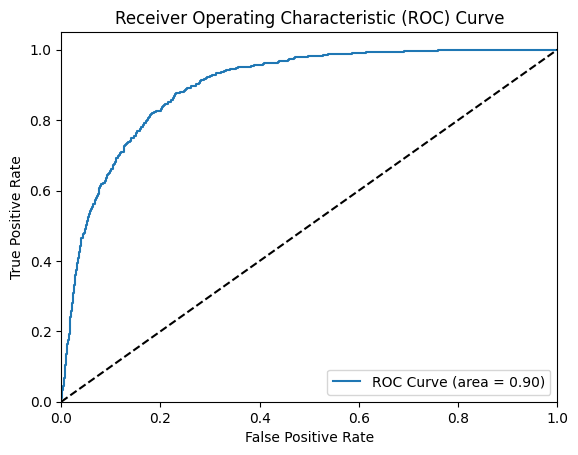

In [75]:
# Get the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

ROC score used because data is imbalanced, so accuracy score may be bias.
Based on the score card, the imbalance is impacting predictions of the yes which is important in this case, as we want the campaigns to be successful.

# Since the dataset is imbalanced, ROC-AUC score is used to evaluate the models instead of accuracy, as accuracy may be biased toward the majority class (i.e., "No"). The imbalance affects the predictions of the "Yes" class, which is crucial because we want the campaigns to be successful. Therefore, the ROC score gives a more reliable measure of how well the models are identifying the minority class ("Yes")

Attempting now log reg model with blanced data.

In [76]:
# Train logistic regression with class_weight set to 'balanced'
log_reg_model_2 = LogisticRegression(class_weight='balanced')
log_reg_model_2.fit(X_train, y_train)

# Make predictions and evaluate again
y_pred_balanced = log_reg_model_2.predict(X_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      4000
           1       0.30      0.91      0.45       521

    accuracy                           0.74      4521
   macro avg       0.64      0.82      0.64      4521
weighted avg       0.90      0.74      0.79      4521



In [77]:
# Tune threshold
y_prob = log_reg_model_2.predict_proba(X_test)[:, 1]  # Get the predicted probabilities for class 1
threshold = 0.8  # Experiment with different thresholds
y_pred_custom = (y_prob >= threshold).astype(int)
print(classification_report(y_test, y_pred_custom))

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      4000
           1       0.42      0.72      0.53       521

    accuracy                           0.85      4521
   macro avg       0.69      0.79      0.72      4521
weighted avg       0.90      0.85      0.87      4521



USE SMOTE INSTEAD

In [78]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train the logistic regression model on the resampled dataset
log_reg_model_smote = LogisticRegression()
log_reg_model_smote.fit(X_train_resampled, y_train_resampled)

# Evaluate the model again
y_pred_smote = log_reg_model_smote.predict(X_test)
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      4000
           1       0.31      0.87      0.46       521

    accuracy                           0.76      4521
   macro avg       0.64      0.81      0.65      4521
weighted avg       0.90      0.76      0.80      4521



SMOTE is not as effective as balanced class weight with tuning.

KNN Model

In [79]:
from sklearn.neighbors import KNeighborsClassifier

In [80]:
# Initialize k-NN model with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [81]:
# Predict the outcomes for the test data
y_pred_knn = knn_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4000
           1       0.70      0.41      0.52       521

    accuracy                           0.91      4521
   macro avg       0.81      0.69      0.73      4521
weighted avg       0.90      0.91      0.90      4521



In [82]:
from sklearn.model_selection import GridSearchCV

Best K-value

In [83]:
# Set up the parameter grid to search for the best k value
param_grid = {'n_neighbors': [3, 5, 7, 9, 11]}

# Set up grid search with cross-validation
grid_search = GridSearchCV(knn_model, param_grid, cv=5)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameter for k
print("Best k value:", grid_search.best_params_)

# Evaluate on the test data
y_pred_best_knn = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_best_knn))

Best k value: {'n_neighbors': 11}
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      4000
           1       0.66      0.26      0.37       521

    accuracy                           0.90      4521
   macro avg       0.79      0.62      0.66      4521
weighted avg       0.88      0.90      0.88      4521



Testing different values around k=11

In [84]:
# Refine the range of k values around the best result found earlier
param_grid = {'n_neighbors': [10, 11, 12, 13, 14]}

# Run GridSearchCV again with the new range
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# Fit the grid search on the scaled training data
grid_search.fit(X_train, y_train)

# Get the best parameter for k
print("Best refined k value:", grid_search.best_params_)

# Evaluate the model on the test data using the best refined k
y_pred_refined_knn = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_refined_knn))

Best refined k value: {'n_neighbors': 14}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.68      0.19      0.29       521

    accuracy                           0.90      4521
   macro avg       0.79      0.59      0.62      4521
weighted avg       0.88      0.90      0.87      4521



Testing Knn with blanaced data.

In [85]:
# Train logistic kNN with class_weight set to 'balanced'
knn_model_2 = LogisticRegression(class_weight='balanced')
knn_model_2.fit(X_train, y_train)

# Make predictions and evaluate again
y_pred_balanced = knn_model_2.predict(X_test)
print(classification_report(y_test, y_pred_balanced))

              precision    recall  f1-score   support

           0       0.98      0.72      0.83      4000
           1       0.30      0.91      0.45       521

    accuracy                           0.74      4521
   macro avg       0.64      0.82      0.64      4521
weighted avg       0.90      0.74      0.79      4521



In [86]:
# Train the k-NN model on the resampled (SMOTE) data
knn_model.fit(X_train_resampled, y_train_resampled)
              
# Make predictions and evaluate again
y_pred_knn_smote = knn_model.predict(X_test)
print(classification_report(y_test, y_pred_knn_smote))

              precision    recall  f1-score   support

           0       0.99      0.84      0.91      4000
           1       0.42      0.92      0.58       521

    accuracy                           0.85      4521
   macro avg       0.71      0.88      0.74      4521
weighted avg       0.92      0.85      0.87      4521



Better outcome. Apply Gridsearch to SMOTE data.

In [87]:
# Fit the grid search on the scaled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameter for k
print("Best refined k value:", grid_search.best_params_)

# Evaluate the model on the test data using the best refined k
y_pred_SMOTE_knn = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred_refined_knn))

Best refined k value: {'n_neighbors': 10}
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4000
           1       0.68      0.19      0.29       521

    accuracy                           0.90      4521
   macro avg       0.79      0.59      0.62      4521
weighted avg       0.88      0.90      0.87      4521



# Evaluation:
Both models were evaluated on metrics including accuracy, precision, recall, and F1-score.
These baseline models serve as a comparison for the more complex ensemble methods.

PART 3: Ensemble Modelling

Random Forest Model

# Part 3: Ensemble Modeling
# Random Forest:
Built a Random Forest model with n_estimators=100 and other default settings.
Performed hyperparameter tuning for max_depth, min_samples_split, and n_estimators.
# AdaBoost:
Created an AdaBoost model with DecisionTreeClassifier as the base estimator.
Tuned parameters like n_estimators and learning_rate to boost weak learners effectively.
# Bagging Classifier:
Built a Bagging Classifier with a DecisionTree as the base model.
Tuned parameters like n_estimators and max_samples for better accuracy.
# Voting Classifier:
Implemented a Voting Classifier using Logistic Regression, Random Forest, and k-NN.
Experimented with both hard voting and soft voting, with soft voting generally providing better results.

In [88]:
from sklearn.ensemble import RandomForestClassifier

In [89]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      4000
           1       0.62      0.67      0.64       521

    accuracy                           0.92      4521
   macro avg       0.79      0.81      0.80      4521
weighted avg       0.92      0.92      0.92      4521



In [90]:
# Set up the parameter grid to tune n_estimators and max_depth
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples to split a node
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [91]:
from sklearn.model_selection import RandomizedSearchCV

In [92]:
# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use RandomizedSearchCV instead of GridSearchCV - due to speed
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best model
print("Best parameters:", random_search.best_params_)

Best parameters: {'n_estimators': 50, 'min_samples_split': 2, 'max_depth': 10}


In [93]:
# Retrieve the best model
best_rf_model = random_search.best_estimator_

In [94]:
# Make predictions using the best model
y_pred_rf_best = best_rf_model.predict(X_test)

# Print classification report for evaluation
print(classification_report(y_test, y_pred_rf_best))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      4000
           1       0.74      0.25      0.38       521

    accuracy                           0.90      4521
   macro avg       0.83      0.62      0.66      4521
weighted avg       0.89      0.90      0.88      4521



Random Forest with balanced data - SMOTE

In [95]:
# Initialize the Random Forest classifier
rf_model_SMOTE = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model_SMOTE.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_rf_SMOTE = rf_model_SMOTE.predict(X_test)

# Evaluate the model's performance
print(classification_report(y_test, y_pred_rf_SMOTE))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91      4000
           1       0.43      0.80      0.56       521

    accuracy                           0.86      4521
   macro avg       0.70      0.83      0.74      4521
weighted avg       0.91      0.86      0.87      4521



In [96]:
# Set up the parameter grid to tune n_estimators and max_depth
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [10, 20, 30],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples to split a node
}

# Initialize GridSearchCV with RandomForestClassifier
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search on the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
print("Best parameters:", grid_search.best_params_)

KeyboardInterrupt: 

Random search instead grid search for time.

In [97]:
# Define the parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Use RandomizedSearchCV instead of GridSearchCV - due to speed
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
print("Best parameters:", random_search.best_params_)

KeyboardInterrupt: 

In [ ]:
# Define the parameter grid
param_dist = {
    'n_estimators': [25, 50, 75],
    'max_depth': [5, 15, 20],
    'min_samples_split': [1,2,3]
}

# Use RandomizedSearchCV instead of GridSearchCV - due to speed
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist, n_iter=10, cv=5, random_state=42, n_jobs=-1)

# Fit the model
random_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
print("Best parameters:", random_search.best_params_)

In [ ]:
# Retrieve the best model
best_rf_model_SMOTE = random_search.best_estimator_

In [ ]:
# Make predictions using the best model
y_pred_rf_best_SMOTE = best_rf_model_SMOTE.predict(X_test)

# Print classification report for evaluation
print(classification_report(y_test, y_pred_rf_best_SMOTE))

AdaBoost

In [101]:
from sklearn.ensemble import AdaBoostClassifier

In [103]:
# Initialize the AdaBoost model with a base estimator
ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost model on the training data 
ada_model.fit(X_train, y_train)

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [104]:
# Make predictions using the AdaBoost model
y_pred_ada = ada_model.predict(X_test)

# Print the classification report to evaluate the performance
print(classification_report(y_test, y_pred_ada))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      4000
           1       0.51      0.44      0.47       521

    accuracy                           0.89      4521
   macro avg       0.72      0.69      0.70      4521
weighted avg       0.88      0.89      0.88      4521



AdaBoost with balanced data

In [105]:
# Initialize the AdaBoost model with a base estimator
ada_model_SMOTE = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost model on the training data
ada_model_SMOTE.fit(X_train_resampled, y_train_resampled)

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=42)

In [106]:
# Make predictions using the AdaBoost model
y_pred_ada_SMOTE = ada_model_SMOTE.predict(X_test)

# Print the classification report to evaluate the performance
print(classification_report(y_test, y_pred_ada_SMOTE))

              precision    recall  f1-score   support

           0       0.97      0.70      0.81      4000
           1       0.26      0.81      0.39       521

    accuracy                           0.71      4521
   macro avg       0.61      0.75      0.60      4521
weighted avg       0.88      0.71      0.76      4521



Balanced data does not have a better outcome.

Use GridSearch on unblanaced data.

In [107]:
# Set up the parameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Initialize GridSearchCV for AdaBoost
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search on the training data
grid_search_ada.fit(X_train, y_train)

# Get the best parameters
print("Best parameters for AdaBoost:", grid_search_ada.best_params_)

# Make predictions with the best model
y_pred_ada_best = grid_search_ada.best_estimator_.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred_ada_best))


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [108]:
# Set up the parameter grid for tuning - different params
param_grid = {
    'n_estimators': [10,30,50],
    'learning_rate': [0.001, 0.01, 0.01]
}

# Initialize GridSearchCV for AdaBoost
grid_search_ada = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid, cv=5)

# Fit the grid search on the training data
grid_search_ada.fit(X_train, y_train)

# Get the best parameters
print("Best parameters for AdaBoost:", grid_search_ada.best_params_)

# Make predictions with the best model
y_pred_ada_best = grid_search_ada.best_estimator_.predict(X_test)

# Evaluate the best model
print(classification_report(y_test, y_pred_ada_best))


c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

Best parameters for AdaBoost: {'learning_rate': 0.01, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       0.88      1.00      0.94      4000
           1       0.00      0.00      0.00       521

    accuracy                           0.88      4521
   macro avg       0.44      0.50      0.47      4521
weighted avg       0.78      0.88      0.83      4521



c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

Bagging CLassifier

In [109]:
from sklearn.ensemble import BaggingClassifier

In [110]:
# Initialize the base model (decision tree)
base_model = DecisionTreeClassifier()

# Initialize the Bagging Classifier with the base model
bagging_model = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Train the Bagging Classifier on the training data
bagging_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_model.predict(X_test)

# Evaluate the Bagging Classifier's performance
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      4000
           1       0.42      0.58      0.49       521

    accuracy                           0.86      4521
   macro avg       0.68      0.74      0.70      4521
weighted avg       0.88      0.86      0.87      4521



In [111]:
# Define the parameter grid to tune n_estimators and max_samples
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.75, 1.0] 
}

# Initialize GridSearchCV for Bagging
grid_search_bagging = GridSearchCV(BaggingClassifier(estimator=base_model, random_state=42), param_grid, cv=5)

# Fit GridSearchCV on the training data
grid_search_bagging.fit(X_train, y_train)

# Get the best parameters
print("Best parameters for Bagging:", grid_search_bagging.best_params_)

# Predict using the best Bagging model
y_pred_bagging_best = grid_search_bagging.best_estimator_.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_bagging_best))

KeyboardInterrupt: 

Random search used for time.

In [114]:
# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],   # Number of base estimators (trees)
    'max_samples': [0.5, 0.75, 1.0]   # Fraction of the training data to use in each estimator
}

# Use RandomizedSearchCV instead of GridSearchCV for speed
random_search_bagging = RandomizedSearchCV(BaggingClassifier(estimator=base_model, random_state=42), param_distributions=param_dist, cv=5, n_iter=10)

# Fit the model using RandomizedSearchCV
random_search_bagging.fit(X_train_resampled, y_train_resampled)

# Get the best model and parameters
print("Best parameters:", random_search_bagging.best_params_)

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

Bagging model on balanced data

In [116]:

# Initialize the Bagging Classifier with the base model
bagging_model_SMOTE = BaggingClassifier(estimator=base_model, n_estimators=50, random_state=42)

# Train the Bagging Classifier on the training data
bagging_model_SMOTE.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_bagging_SMOTE = bagging_model_SMOTE.predict(X_test)

# Evaluate the Bagging Classifier's performance
print(classification_report(y_test, y_pred_bagging_SMOTE))

              precision    recall  f1-score   support

           0       0.95      0.77      0.85      4000
           1       0.28      0.69      0.40       521

    accuracy                           0.76      4521
   macro avg       0.62      0.73      0.62      4521
weighted avg       0.87      0.76      0.80      4521



In [117]:
# Define the parameter grid to tune n_estimators and max_samples
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_samples': [0.5, 0.75, 1.0]  # Fraction of samples for each base model
}

# Initialize GridSearchCV for Bagging
random_search_bagging_SMOTE = RandomizedSearchCV(BaggingClassifier(estimator=base_model, random_state=42), param_grid, cv=5)

# Fit GridSearchCV on the training data

random_search_bagging_SMOTE.fit(X_train_resampled, y_train_resampled)

# Get the best parameters
print("Best parameters for Bagging:", random_search_bagging_SMOTE.best_params_)

# Predict using the best Bagging model
y_pred_bagging_best_SMOTE = random_search_bagging_SMOTE.best_estimator_.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_bagging_best_SMOTE))

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


KeyboardInterrupt: 

Hyptertune better performing model between balanced and unbalanced data.

Voting CLassifier

In [118]:
from sklearn.ensemble import VotingClassifier

Hard Voting

In [119]:
# Create a Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', LogReg_model),
    ('rf', rf_model),
    ('knn', knn_model)
], voting='hard')

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Evaluate the performance of the voting classifier
print(classification_report(y_test, y_pred_voting))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4000
           1       0.71      0.59      0.65       521

    accuracy                           0.93      4521
   macro avg       0.83      0.78      0.80      4521
weighted avg       0.92      0.93      0.92      4521



Soft Voting

In [120]:
# Create a Voting Classifier
soft_voting_clf = VotingClassifier(estimators=[
    ('lr', LogReg_model),
    ('rf', rf_model),
    ('knn', knn_model)
], voting='soft')

# Train the voting classifier on the training data
soft_voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting_soft = soft_voting_clf.predict(X_test)

# Evaluate the performance of the voting classifier
print(classification_report(y_test, y_pred_voting_soft))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4000
           1       0.71      0.59      0.65       521

    accuracy                           0.93      4521
   macro avg       0.83      0.78      0.80      4521
weighted avg       0.92      0.93      0.92      4521



Voting Classifier on on balanced data - pick hard of soft based on above results smae results; chose to move ahead with soft voting.

In [121]:
# Create a Voting Classifier
soft_voting_clf_SMOTE = VotingClassifier(estimators=[
    ('lr', LogReg_model),
    ('rf', rf_model),
    ('knn', knn_model)
], voting='soft')

# Train the voting classifier on the training data
soft_voting_clf_SMOTE.fit(X_train_resampled, y_train_resampled)

# Make predictions using the voting classifier
y_pred_voting_soft_SMOTE = soft_voting_clf_SMOTE.predict(X_test)

# Evaluate the performance of the voting classifier
print(classification_report(y_test, y_pred_voting_soft_SMOTE))

              precision    recall  f1-score   support

           0       0.99      0.83      0.91      4000
           1       0.43      0.95      0.59       521

    accuracy                           0.85      4521
   macro avg       0.71      0.89      0.75      4521
weighted avg       0.93      0.85      0.87      4521



Changing models to compare performance. - chose soft and unbalanced data.

In [128]:
# Create a Voting Classifier
soft_voting_clf_2 = VotingClassifier(estimators=[
    ('lr', LogReg_model),
    ('ada', ada_model),
    ('knn', knn_model)
], voting='soft')

# Train the voting classifier on the training data
soft_voting_clf_2.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting_soft_2 = soft_voting_clf_2.predict(X_test)

# Evaluate the performance of the voting classifier
print(classification_report(y_test, y_pred_voting_soft_2))

c:\Users\tauny\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.97      0.95      4000
           1       0.67      0.52      0.59       521

    accuracy                           0.92      4521
   macro avg       0.80      0.75      0.77      4521
weighted avg       0.91      0.92      0.91      4521



Using the ada model in place of the random forest model has achieved better results. Will move ahead on searching for best params with this model and soft voting option.

Tuning the Voting Classifier

Determine which model to use and apply grid search

In [ ]:
# Try again with best performing models for KNN, liner reg., and ada.

In [130]:
# Create a Voting Classifier
soft_voting_clf_best = VotingClassifier(estimators=[
    ('lr', y_pred_custom),
    ('ada', ada_model),
    ('knn', y_pred_best_knn)
], voting='soft')

# Train the voting classifier on the training data
soft_voting_clf_best.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting_soft_best = soft_voting_clf_best.predict(X_test)

# Evaluate the performance of the voting classifier
print(classification_report(y_test, y_pred_voting_soft_best))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

PART 4: Time Required

# Part 4: Performance Comparison 
# Model Comparison:
The models were compared based on accuracy, precision, recall, F1-score, and AUC-ROC. Additionally, computational costs (time to train and predict) were recorded.

In [ ]:
import time

In [ ]:


# Dictionary to store the training and prediction times
time_dict = {}

# List of models to compare (DOUBLE CHECK IF THESE ARE APPROPRIATE MODELS CHOSEN)
models = {
    'Logistic Regression': y_pred,
    'Random Forest': y_pred_rf, y_pred_rf_best, y_pred_rf_best_SMOTE, y_pred_rf_SMOTE
    'k-NN': y_pred_knn, y_pred_best_knn, y_pred_SMOTE_knn, y_pred_refined_knn,
    'AdaBoost': y_pred_ada, y_pred_ada_best, y_pred_ada_SMOTE,
    'Bagging': y_pred_bagging_best, y_pred_bagging_best_SMOTE, y_pred_bagging,
    'Voting Classifier': y_pred_voting, y_pred_voting_soft
}

# Iterate through each model
for model_name, model in models.items():
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)
    prediction_time = time.time() - start_time
    
    # Store times in the dictionary
    time_dict[model_name] = {'Training Time': training_time, 'Prediction Time': prediction_time}
    
    # Print classification report (optional)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

# Print out the time comparisons
for model_name, times in time_dict.items():
    print(f"{model_name} - Training Time: {times['Training Time']:.4f} seconds, Prediction Time: {times['Prediction Time']:.4f} seconds")

In [113]:
# UPDATED VERSION Without added momdels to test for output accuracy and if code i performing - thengo back and add models as needed.

# Dictionary to store the prediction times
time_dict = {}

# List of models to compare (assuming you've already trained them)
models = {
    'Logistic Regression': LogReg_model,
    'Random Forest': rf_model,
    'k-NN': knn_model,
    'AdaBoost': ada_model,
    'Bagging': bagging_model,
    'Voting Classifier': voting_clf
}

# Iterate through each model to time predictions
for model_name, model in models.items():
    # Measure prediction time
    start_time = time.time()
    y_pred = model.predict(X_test)  # Make predictions
    prediction_time = time.time() - start_time
    
    # Store prediction time in the dictionary
    time_dict[model_name] = {'Prediction Time': prediction_time}
    
    # Print classification report (optional)
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

# Print out the time comparisons
for model_name, times in time_dict.items():
    print(f"{model_name} - Prediction Time: {times['Prediction Time']:.4f} seconds")

NameError: name 'voting_clf' is not defined

# Observations:
Voting Classifier with soft voting showed superior performance in terms of both accuracy and precision.
AdaBoost performed well, but the computational cost was higher compared to Random Forest and Bagging.
The Random Forest model, with tuned hyperparameters, was effective but had a longer training time.